In [2]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))

import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import os
import pickle
import pandas as pd
from collections import Counter

import librosa   #for audio processing
import librosa.display
# import tensorflow as tf


In [3]:
import helper


In [4]:
from data_augmentation import Data_Augmentation
from data_loader import DataLoader


In [5]:
train_path = "../data/train/"
test_path = "../data/test/"

In [6]:
train_audio_folder  = train_path + "/wav/"
train_script_file = train_path + "trsTrain.txt"
sample_rate = 8000

In [7]:
def clean_signal(signal, normalize = False ,trim_db = None, clean_db = None):

    if normalize:
        feats_mean = np.mean(signal, axis=0)
        feats_std = np.std(signal, axis=0)
        signal = (signal - feats_mean) / (feats_std + 1e-14)

    if trim_db:
        signal, index = librosa.effects.trim(signal, top_db=trim_db)

    if clean_db:
        yt = librosa.effects.split(signal, top_db=clean_db)
        clean_signal = []
        for start_i, end_i in yt:
            clean_signal.append( signal[start_i: end_i])

        signal = np.concatenate(np.array(clean_signal),axis=0)

    return signal

In [8]:
data_loader = DataLoader(train_audio_folder, train_script_file, sr=sample_rate)


In [11]:
translation_obj = data_loader.extract_transcription_and_labels()
audio_dict = data_loader.extract_audio(5000)

In [12]:

helper.write_obj("../data/audio_dict.pkl", audio_dict)
helper.write_obj("../data/translation_dict.pkl", translation_obj)


In [14]:
translation_obj = helper.read_obj("../data/translation_dict.pkl")
audio_obj = helper.read_obj("../data/audio_dict.pkl")
meta_data = data_loader.create_meta_data(translation_obj, audio_obj)

In [15]:
display(len(translation_obj))

10875

In [17]:
display(len(audio_obj))

5000

In [28]:
sample_label = list(audio_obj.keys())[490]
display(translation_obj[sample_label])
display(ipd.Audio(audio_obj[sample_label][0], rate=rate))

'የ ሰርጉ ወጥ ኩ ችም ተደርጐ ነው የ ተሰራው'

In [18]:
meta_data

,translation,label,channel,sample_rate,duration
0,የተለያዩ የ ትግራይ አውራጃ ተወላጆች ገንዘባቸው ን አዋጥ ተው የ ልማት ...,tr_10000_tr097082,1,8000,9.088
1,የ ጠመንጃ ተኩስ ተከፈተ ና አራት የኤርትራ ወታደሮች ተገደሉ,tr_10001_tr097083,1,8000,5.632
2,ላነሷቸው ጥያቄዎች የ ሰጡት ን መልስ አቅርበ ነዋል,tr_10002_tr097084,1,8000,6.144
3,እ ብዱ አስፋልቱ ላይ የ ኰለኰ ለ ው ድንጋይ መኪና አላ ሳልፍ አለ,tr_10003_tr097085,1,8000,5.760
4,ጠጁ ን ኰ መኰ መ ኰ መኰ መ ና ሚስቱ ን ሲ ያሰቃ ያት አደረ,tr_10004_tr097086,1,8000,5.376
...,...,...,...,...,...
4995,እነ አቶ ተወልደ ካድሬው የሚ ያግዛቸው መስሏቸው ተስፋ አድርገው እንደ ነ...,tr_4709_tr48010,1,8000,7.936
4996,የ አውሮፓ ፓር ሊያ ሜንት በ ኢትዮጵያ ዲሞክራሲያዊ ሂደት ላይ ያለውን ጥ...,tr_470_tr05070,1,8000,6.272
4997,አንቺ ቆንጆ የምት ያቸው እንዴት ያሉት ን ሴቶች ነው ለስላሳ ሳቅ በ አዳ...,tr_4710_tr48011,1,8000,5.632
4998,በ አይ ኤም ኤፍ የ ዋሽንግተን ስብሰባ የ ኢትዮጵያ ልኡክ ሊ ሄድ ነው,tr_4711_tr48012,1,8000,4.480


In [19]:
helper.save_csv(meta_data, "../data/meta_data.csv")

File Successfully Saved.!!!


,translation,label,channel,sample_rate,duration
0,የተለያዩ የ ትግራይ አውራጃ ተወላጆች ገንዘባቸው ን አዋጥ ተው የ ልማት ...,tr_10000_tr097082,1,8000,9.088
1,የ ጠመንጃ ተኩስ ተከፈተ ና አራት የኤርትራ ወታደሮች ተገደሉ,tr_10001_tr097083,1,8000,5.632
2,ላነሷቸው ጥያቄዎች የ ሰጡት ን መልስ አቅርበ ነዋል,tr_10002_tr097084,1,8000,6.144
3,እ ብዱ አስፋልቱ ላይ የ ኰለኰ ለ ው ድንጋይ መኪና አላ ሳልፍ አለ,tr_10003_tr097085,1,8000,5.760
4,ጠጁ ን ኰ መኰ መ ኰ መኰ መ ና ሚስቱ ን ሲ ያሰቃ ያት አደረ,tr_10004_tr097086,1,8000,5.376
...,...,...,...,...,...
4995,እነ አቶ ተወልደ ካድሬው የሚ ያግዛቸው መስሏቸው ተስፋ አድርገው እንደ ነ...,tr_4709_tr48010,1,8000,7.936
4996,የ አውሮፓ ፓር ሊያ ሜንት በ ኢትዮጵያ ዲሞክራሲያዊ ሂደት ላይ ያለውን ጥ...,tr_470_tr05070,1,8000,6.272
4997,አንቺ ቆንጆ የምት ያቸው እንዴት ያሉት ን ሴቶች ነው ለስላሳ ሳቅ በ አዳ...,tr_4710_tr48011,1,8000,5.632
4998,በ አይ ኤም ኤፍ የ ዋሽንግተን ስብሰባ የ ኢትዮጵያ ልኡክ ሊ ሄድ ነው,tr_4711_tr48012,1,8000,4.480


In [20]:
sample_audio_obj = audio_obj['tr_10032_tr097114']
sample_audio = sample_audio_obj[0]
rate = sample_audio_obj[-1]

In [21]:
data_augmentor = Data_Augmentation()

### Data Agumentation, adding noise

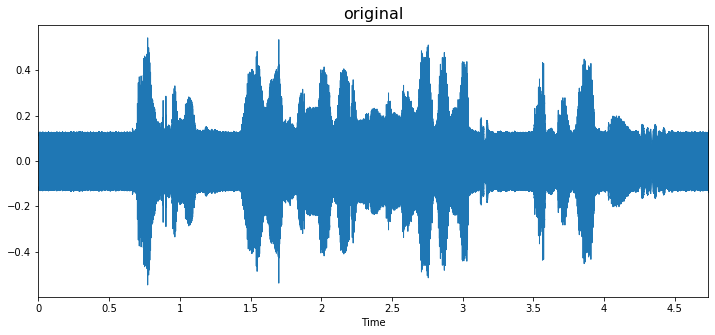

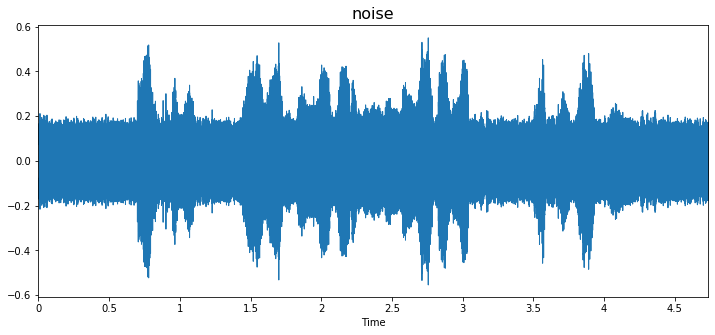

In [22]:

plt.figure(figsize=(12, 5))
librosa.display.waveplot(sample_audio, sr=rate)
plt.title("original", fontsize=16)
plt.show()
display(ipd.Audio(sample_audio, rate=rate))

noise_1 = data_augmentor.add_noise(sample_audio)

plt.figure(figsize=(12, 5))
librosa.display.waveplot(noise_1, sr=rate)
plt.title("noise", fontsize=16)
plt.show()
ipd.Audio(noise_1, rate=rate)


### Shiffiting to left and right

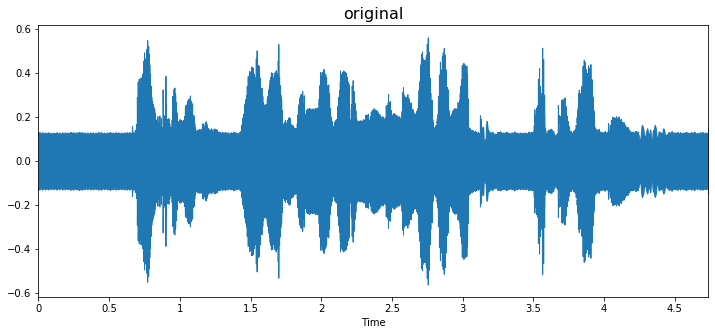

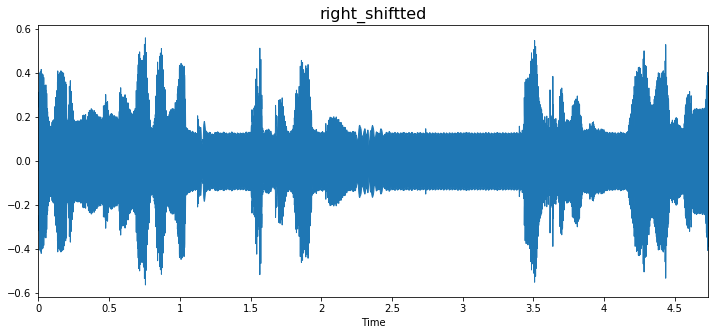

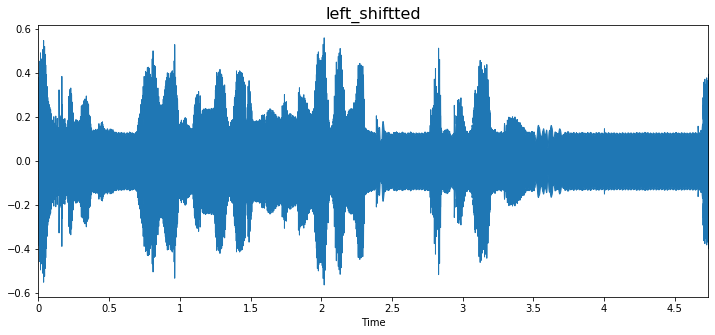

In [21]:

plt.figure(figsize=(12, 5))
librosa.display.waveplot(sample_audio, sr=rate)
plt.title("original", fontsize=16)
plt.show()
display(ipd.Audio(sample_audio, rate=rate))

right_shift = data_augmentor.shift_signal(sample_audio, rate, 2,  "right")

plt.figure(figsize=(12, 5))
plt.title("right_shiftted", fontsize=16)
librosa.display.waveplot(right_shift, sr=rate)
plt.show()
display(ipd.Audio(right_shift, rate=rate))


left_shift = data_augmentor.shift_signal(sample_audio, rate, 4,  "left")
plt.figure(figsize=(12, 5))
plt.title("left_shiftted", fontsize=16)
librosa.display.waveplot(left_shift, sr=rate)
plt.show()
display(ipd.Audio(left_shift, rate=rate))



### pitch

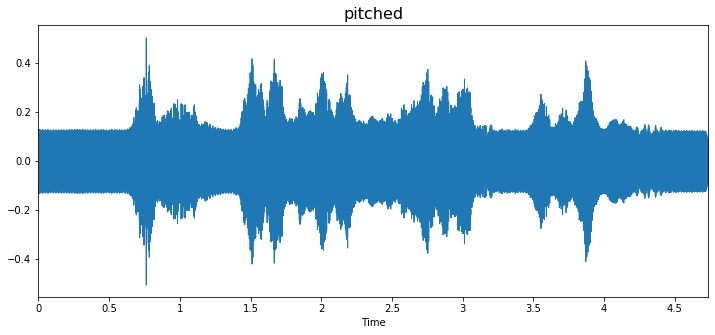

In [22]:
pitch_shift = data_augmentor.change_pitch(sample_audio, rate)

plt.figure(figsize=(12, 5))
plt.title("pitched", fontsize=16)
librosa.display.waveplot(pitch_shift, sr=rate)
plt.show()
display(ipd.Audio(pitch_shift, rate=rate))


### Speed

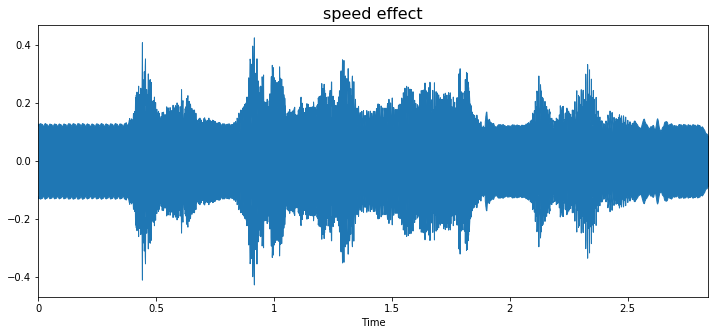

In [23]:
speed_man = data_augmentor.change_speed(sample_audio)

plt.figure(figsize=(12, 5))
plt.title("speed effect", fontsize=16)
librosa.display.waveplot(speed_man, sr=rate)
plt.show()
display(ipd.Audio(speed_man, rate=rate))


### MFCC

In [24]:
def extract_features(audios : dict, sample_rate : int) -> dict:
    """
    The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of 
    features (usually about 10–20) which concisely describe the overall shape of a 
    spectral envelope. It models the characteristics of the human voice.
    We compute the Mel frequency cepstral coefficients for each audio file.

    Inputs: 
    audios - a dictionary mapping the wav file names to the sampled audio array
    sample_rate - the sample rate for the audio

    Returns:
    mfcc_features - a python dictionary mapping the wav file names to the mfcc 
                  coefficients of the sampled audio files
    """
    mfcc_features = {}
    for audio in audios:
        mfcc_features[audio] = librosa.feature.mfcc(audios[audio], sr=sample_rate)
    return mfcc_features



In [28]:
audios = {}

for label in audio_obj:
    audios[label] = audio_obj[label][0]
    
mfcc_features = extract_features(audios, sample_rate)


### Plot MFCC

(20, 160)


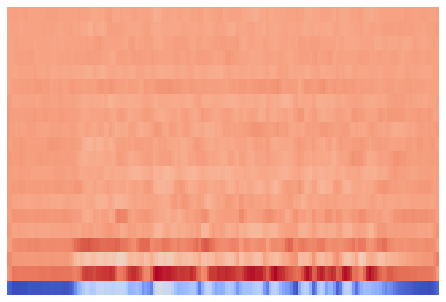

In [30]:
# MFCC
fig, ax = plt.subplots()
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
mfccs = mfcc_features[list(mfcc_features.keys())[88]]
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=44100, x_axis='time')

### Tokenizer

In [5]:
class Tokenizer:
    
    def __init__(self, translations):
        self.translations = translations
        self.unk = -1
        
    def build_dict(self):
        text = ''
        for t in self.translations:
            text += t
        
        char_counts = Counter(text)
        sorted_vocab = sorted(char_counts, key=char_counts.get, reverse=True)
        int_to_char = {ii: word for ii, word in enumerate(sorted_vocab, 1)}

        char_to_int = {word: ii for ii, word in int_to_char.items()}
        
        return int_to_char, char_to_int
    
    def encode(self, sent, char_to_int):
        
        encoded = []
        char_list = list(sent)
        for c in char_list:
            try:
                encoded.append(char_to_int[c])
            
            except KeyError:
                encoded.append(self.unk)
        return encoded
    
    def decode_text(self, encoded_chars, int_to_char):
        
        decoded = ''
        for e in encoded_chars:
            try:
                decoded += e
            
            except KeyError:
                decoded += ''
        
        return decoded
        
    
        
        
         
        

        

### Data Generator

In [6]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self,  translations, audios, batch_size=32, shuffle=True):
        self.audios = audios
        self.labels = translations
        self.batch_size = batch_size
        self.len = int(np.floor(len(self.labels) / self.batch_size))
        self.shuffle = shuffle
        self.on_epoch_end()
        
        self.tokenizer = Tokenizer(translations)
        self.int_to_char, self.char_to_int = tokenizer.build_dict()
        
        self.cur_index = 0

    def __len__(self):
        return self.len
    
    def encode_text(self, translations):
        encoded_trans =  []
        
        for t in translations:
            encoded = self.tokenizer.encode(t, self.char_to_int)
            encoded_trans.append(encoded)
        
        return encoded_trans
    
    def get_max_len(self, items):
        maximum = 0
        for i in items:
            if len(i) > maximum:
                maximum = len(i)
                
        return maximum

            
    def __data_generation(self, batch_translations, batch_audios):
     
        self.cur_index = 0
        encoded_trans = self.encode_text(batch_translations)
        
        maximum_trans_len = self.get_max_len(encoded_trans)
        maximum_audio_len = self.get_max_len(batch_audios)
        
        
        encoded_trans_np = np.zeros((len(encoded_trans), maximum_trans_len), dtype="int64")
        padded_audios_np = np.zeros((len(batch_audios), maximum_audio_len), dtype="float32")
        
        label_length = np.zeros(padded_audios_np.shape[0], dtype="int64")
        input_length = np.zeros(encoded_trans_np.shape[0], dtype="int64")
        
        
        ind = 0
        for trans, audio in zip(encoded_trans, batch_audios):
            encoded_trans_np[ind,0:len(trans)] = trans
            label_length[ind] = len(trans)
            
            padded_audio = np.pad(audio, (0, maximum_audio_len - len(audio)), mode = 'constant', constant_values=0)
            
            padded_audios_np[ind, ] = padded_audio
            input_length[ind] = len(audio)
            
            ind += 1
        
        outputs = {'ctc': np.zeros([self.batch_size])}
        inputs = {'the_input':   tf.convert_to_tensor(padded_audios_np), 
                  'the_labels':   tf.convert_to_tensor(encoded_trans_np), 
                  'input_length':   tf.convert_to_tensor(input_length), 
                  'label_length':   tf.convert_to_tensor(label_length) 
                 }
        
        return (inputs, outputs)
            
    def on_epoch_end(self):
                
        self.indexes = np.arange(self.len*self.batch_size)

        if self.shuffle == True:

            self.indexes = self.indexes.reshape(int(self.len), int(self.batch_size))
            np.random.shuffle(self.indexes)

            for i in range(self.len):
                np.random.shuffle(self.indexes[i])

            self.indexes = self.indexes.reshape(int(self.len*self.batch_size))


    def __getitem__(self, index):
        indexes = self.indexes[int(index*self.batch_size):int((index+1)*self.batch_size)]
        
        self.cur_index += self.batch_size
        
        if  self.cur_index >= len(self.labels):
            self.cur_index = 0

        batch_labels = [self.labels[int(k)] for k in indexes]
        batch_audios = [self.audios[int(k)] for k in indexes]
        
        batch_labels = self.labels[self.cur_index:  self.cur_index + self.batch_size]
        batch_audios = self.audios[ self.cur_index:  self.cur_index + self.batch_size]
    
        
        return  self.__data_generation(batch_labels, batch_audios)

### Custome LogMelSpectrogram Layer

In [7]:
class LogMelSpectrogram(tf.keras.layers.Layer):
    """Compute log-magnitude mel-scaled spectrograms."""

    def __init__(self, sample_rate, fft_size, hop_size, n_mels,
                 f_min=0.0, f_max=None, **kwargs):
        super(LogMelSpectrogram, self).__init__(**kwargs)
        self.sample_rate = sample_rate
        self.fft_size = fft_size
        self.hop_size = hop_size
        self.n_mels = n_mels
        self.f_min = f_min
        self.f_max = f_max if f_max else sample_rate / 2
        self.mel_filterbank = tf.signal.linear_to_mel_weight_matrix(
            num_mel_bins=self.n_mels,
            num_spectrogram_bins=fft_size // 2 + 1,
            sample_rate=self.sample_rate,
            lower_edge_hertz=self.f_min,
            upper_edge_hertz=self.f_max)

    def build(self, input_shape):
        self.non_trainable_weights.append(self.mel_filterbank)
        super(LogMelSpectrogram, self).build(input_shape)

    def call(self, waveforms):
        """Forward pass.
        Parameters
        ----------
        waveforms : tf.Tensor, shape = (None, n_samples)
            A Batch of mono waveforms.
        Returns
        -------
        log_mel_spectrograms : (tf.Tensor), shape = (None, time, freq, ch)
            The corresponding batch of log-mel-spectrograms
        """
        def _tf_log10(x):
            numerator = tf.math.log(x)
            denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
            return numerator / denominator

        def power_to_db(magnitude, amin=1e-16, top_db=80.0):
            """
            https://librosa.github.io/librosa/generated/librosa.core.power_to_db.html
            """
            ref_value = tf.reduce_max(magnitude)
            log_spec = 10.0 * _tf_log10(tf.maximum(amin, magnitude))
            log_spec -= 10.0 * _tf_log10(tf.maximum(amin, ref_value))
            log_spec = tf.maximum(log_spec, tf.reduce_max(log_spec) - top_db)

            return log_spec

        spectrograms = tf.signal.stft(waveforms,
                                      frame_length=self.fft_size,
                                      frame_step=self.hop_size,
                                      pad_end=False)

        magnitude_spectrograms = tf.abs(spectrograms)

        mel_spectrograms = tf.matmul(tf.square(magnitude_spectrograms),
                                     self.mel_filterbank)

        log_mel_spectrograms = power_to_db(mel_spectrograms)

        # add channel dimension
        log_mel_spectrograms = tf.expand_dims(log_mel_spectrograms, 3)

        return log_mel_spectrograms

    def get_config(self):
        config = {
            'fft_size': self.fft_size,
            'hop_size': self.hop_size,
            'n_mels': self.n_mels,
            'sample_rate': self.sample_rate,
            'f_min': self.f_min,
            'f_max': self.f_max,
        }
        config.update(super(LogMelSpectrogram, self).get_config())

        return config

### Model for logspectorgram generation

In [8]:
def preprocessin_model(sample_rate, fft_size, frame_step, n_mels, mfcc=False):

    input_data = Input(name='input', shape=(None,), dtype="float32")
    featLayer = LogMelSpectrogram(
        fft_size=fft_size,
        hop_size=frame_step,
        n_mels=n_mels,
        
        sample_rate=sample_rate,
        f_min=0.0,
        
        f_max=int(sample_rate / 2)
    )(input_data)
    
    x = BatchNormalization()(featLayer)
    model = Model(inputs=input_data, outputs=x, name="preprocessin_model")

    return model

In [9]:
def BidirectionalRNN(input_dim, batch_size, sample_rate=22000,
                     rnn_layers=2, units=400, drop_out=0.5, act='tanh', output_dim=224):

    input_data = Input(name='the_input', shape=(
        None, input_dim), batch_size=batch_size)
    


    
    x = Bidirectional(LSTM(units,  activation=act,
                      return_sequences=True, implementation=2))(input_data)
    
    x = BatchNormalization()(x)
    x = Dropout(drop_out)(x)

    for i in range(rnn_layers - 2):
        x = Bidirectional(
            LSTM(units, activation=act, return_sequences=True))(x)
        x = BatchNormalization()(x)
        x = Dropout(drop_out)(x)

    x = Bidirectional(LSTM(units,  activation=act,
                      return_sequences=True, implementation=2))(x)
    x = BatchNormalization()(x)
    x = Dropout(drop_out)(x)

    time_dense = TimeDistributed(Dense(output_dim))(x)

    y_pred = Activation('softmax', name='softmax')(time_dense)

    model = Model(inputs=input_data, outputs=y_pred, name="BidirectionalRNN")

    return model

In [24]:
def simple_rnn_model(input_dim, output_dim=224):

    input_data = Input(name='the_input', shape=(None, input_dim))
    simp_rnn = GRU(output_dim, return_sequences=True,
                   implementation=2, name='rnn')(input_data)
    y_pred = Activation('softmax', name='softmax')(simp_rnn)
    model = Model(inputs=input_data, outputs=y_pred, name="simple_rnn_model")
    model.output_length = lambda x: x
    return model


In [25]:
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [26]:
def input_lengths_lambda_func(args):
    hop_size = frame_step
    input_length = args
    return tf.cast(tf.math.ceil(input_length/hop_size)-1, dtype="float32")

In [27]:
def add_ctc_loss(model_builder):
    the_labels      = Input(name='the_labels',      shape=(None,), dtype='float32')
    input_lengths   = Input(name='input_length',    shape=(1,), dtype='float32')
    label_lengths   = Input(name='label_length',    shape=(1,), dtype='float32')

    input_lengths2 = Lambda(input_lengths_lambda_func)(input_lengths)
    if model_builder.output_length:
         output_lengths  = Lambda(model_builder.output_length)(input_lengths2) - 1
    else:
         output_lengths  = input_lengths2
    
    # CTC loss is implemented in a lambda layer
    loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([model_builder.output, the_labels, output_lengths, label_lengths])
    model = Model( inputs=[model_builder.input, the_labels, input_lengths, label_lengths],  outputs=loss_out)
    return model


In [29]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import * 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import backend as K

In [30]:
def train(model_builder, 
          data_len,
          data_gen,
          batch_size = 25,
          epochs=20, 
          verbose=1,
          optimizer=SGD(learning_rate=0.002, decay=1e-6, momentum=0.9, nesterov=True, clipnorm=5),
          ):    
              
    model = add_ctc_loss(model_builder)

    model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=optimizer)
    print(model.summary())


    hist = model.fit_generator(generator=data_gen,
                               epochs=epochs,
                               verbose=verbose, 
                               use_multiprocessing=False)

### Training

In [53]:
audios = []
for label in audio_obj:
    audios.append(audio_obj[label][0])
    
translations = []
for label in audio_obj:
    translations.append(translation_obj[label])

In [68]:
tokenizer = Tokenizer(translations)
int_to_char, char_to_int = tokenizer.build_dict()
sample = translations[0]
encoded = tokenizer.encode(sample, char_to_int)
decoded = tokenizer.decode_text(sample, encoded)

print(f"sample snt: {sample}")
print(f"encoded snt: {encoded}")
print(f"decoed snt: {decoded}")

sample snt: የተለያዩ የ ትግራይ አውራጃ ተወላጆች ገንዘባቸው ን አዋጥ ተው የ ልማት ተቋማትን እንዲ መሰርቱ ትልማ አይ ፈቅድ ም
encoded snt: [8, 10, 13, 7, 111, 1, 8, 1, 3, 40, 23, 21, 1, 6, 4, 23, 98, 1, 10, 32, 28, 124, 16, 1, 17, 2, 75, 27, 31, 4, 1, 2, 1, 6, 41, 42, 1, 10, 4, 1, 8, 1, 11, 29, 3, 1, 10, 87, 29, 3, 2, 1, 19, 2, 50, 1, 12, 25, 14, 51, 1, 3, 11, 29, 1, 6, 21, 1, 76, 57, 30, 1, 18]
decoed snt: የተለያዩ የ ትግራይ አውራጃ ተወላጆች ገንዘባቸው ን አዋጥ ተው የ ልማት ተቋማትን እንዲ መሰርቱ ትልማ አይ ፈቅድ ም


In [69]:

sample_rate = 22000
fft_size = 1024
frame_step = 512
n_mels = 128

batch_size = 100
epochs = 20
data_len = len(translations)
output_dim = len(char_to_int) + 2


In [70]:
dg = DataGenerator(translations, audios, batch_size)


In [71]:
preprocess_model = preprocessin_model(sample_rate, fft_size, frame_step, n_mels)
preprocess_model.summary()


Model: "preprocessin_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, None)]            0         
_________________________________________________________________
log_mel_spectrogram_4 (LogMe (None, None, 128, 1)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, None, 128, 1)      4         
Total params: 4
Trainable params: 2
Non-trainable params: 2
_________________________________________________________________


In [72]:
speech_model = simple_rnn_model(n_mels, output_dim)
speech_model.summary()
# speech_model = BidirectionalRNN(n_mels, output_dim=output_dim)
# speech_model.summary()

Model: "simple_rnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 128)]       0         
_________________________________________________________________
rnn (GRU)                    (None, None, 175)         160125    
_________________________________________________________________
softmax (Activation)         (None, None, 175)         0         
Total params: 160,125
Trainable params: 160,125
Non-trainable params: 0
_________________________________________________________________


In [75]:
def build_model(output_dim, custom_model, preprocess_model, mfcc=False, calc=None):

    input_audios = Input(name='the_input', shape=(None,))
    pre = preprocess_model(input_audios)
    pre = tf.squeeze(pre, [3])

    y_pred = custom_model(pre)
    model = Model(inputs=input_audios, outputs=y_pred, name="model_builder")
    model.output_length = calc

    return model

In [76]:
model = build_model(output_dim, speech_model, preprocess_model)
model.summary()


Model: "model_builder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None)]            0         
_________________________________________________________________
preprocessin_model (Function (None, None, 128, 1)      4         
_________________________________________________________________
tf.compat.v1.squeeze_5 (TFOp (None, None, 128)         0         
_________________________________________________________________
simple_rnn_model (Functional (None, None, 175)         160125    
Total params: 160,129
Trainable params: 160,127
Non-trainable params: 2
_________________________________________________________________


In [77]:
import mlflow

In [79]:
mlflow.set_experiment('Speech Model-RNN-baseline')
mlflow.tensorflow.autolog()
train(model, 100, dg, epochs=20,  batch_size=100)


2021/08/08 13:16:37 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd9db32294f5c4678815d6b6efc825325', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input (InputLayer)          [(None, None)]       0                                            
__________________________________________________________________________________________________
preprocessin_model (Functional) (None, None, 128, 1) 4           the_input[0][0]                  
__________________________________________________________________________________________________
tf.compat.v1.squeeze_5 (TFOpLam (None, None, 128)    0           preprocessin_model[1][0]         
__________________________________________________________________________________________________
input_length (InputLayer)       [(None, 1)]          0                                            
____________________________________________________________________________________________